In [1]:
import os
import sys
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from importlib import reload
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import numpy as np

In [2]:
sys.path.append("../../src")

In [3]:
import main

# Meteobikes

Meteobike data from 27th June 2023

In [10]:
mbike = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/ALL-SYSTEMS-2023-06-27.csv')

In [8]:
mbike['Absolute_temperature_degC'].mean()

20.21481568759468

In [5]:
bldgs = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_buildings_3D.parquet')
streets = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_streets.parquet')
nodes = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_nodes.parquet')

# If running for the first time

In [66]:
i = 300
stn_buffers = main.buffer_stations(mbike, radius=i, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'Latitude', lon_column = 'Longitude')
stn_buffers = main.neighbourhood_graph_params(bldgs, stn_buffers)
b,s,n = main.select_objects(bldgs, streets, nodes, stn_buffers)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py

In [67]:
stn_buffers = main.aggregate_params(b,s,n, stn_buffers)

/Users/lisawink/Documents/freiburg/notebooks/visualisations/../../src/main.py:363: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[[i+'_wmean',i+'_wstd',i+'_wmedian',i+'_wmin',i+'_wmax',i+'_wsum',i+'_wper25',i+'_wper75']] = selected_buildings.groupby('station_id')[[i,weight]].apply(weighted_stats, i, weight)
/Users/lisawink/Documents/freiburg/notebooks/visualisations/../../src/main.py:363: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[[i+'_wmean',i+'_wstd',i+'_wmedian',i+'_wmin',i+'_wmax',i+'_wsum',i+'_wper25',i+'_wper75']] 

In [68]:
masked_svf_path = '/Users/lisawink/Documents/paper1/data/processed_data/SVF_street_buildings_only.tif'
stn_buffers = main.agg_raster(masked_svf_path, stn_buffers, 'SVF_3D',majority=True)
stn_buffers.to_parquet('/Users/lisawink/Documents/paper1/data/processed_data/mbike/270623_processed_station_params_' + str(i) + '.parquet')

In [105]:
i

'StrClo400_median'

In [7]:
# up to radius 600m, every mbike measurement was takes
# radius 600-900m, every 5th measurement was taken
# radius 1000m, every 10th measurement was taken
# radius 1000-1200m, every 15th measurement was taken
# radius 1500, every 30th measurement was taken
# radius 2000, every 100th measurement was taken
# radius 3000, every 200th measurement was taken


In [14]:
i = 1500

In [19]:
main.buffer_stations(mbike.iloc[::100, :], radius=i, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'Latitude', lon_column = 'Longitude').explore()

In [8]:
radii = [300]

for i in radii:
    stn_buffers = main.buffer_stations(mbike.iloc[::10, :], radius=i, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'Latitude', lon_column = 'Longitude')
    stn_buffers = main.neighbourhood_graph_params(bldgs, stn_buffers)
    b,s,n = main.select_objects(bldgs, streets, nodes, stn_buffers)
    stn_buffers = main.aggregate_params(b,s,n, stn_buffers)
    masked_svf_path = '/Users/lisawink/Documents/paper1/data/processed_data/SVF_street_buildings_only.tif'
    stn_buffers = main.agg_raster(masked_svf_path, stn_buffers, 'SVF_3D')
    stn_buffers.to_parquet('/Users/lisawink/Documents/paper1/data/processed_data/mbike/270623_processed_station_params_' + str(i) + '.parquet')

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py

In [106]:
i=300

In [107]:
stn_buffers = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/mbike/270623_processed_station_params_' + str(i) + '.parquet')

In [108]:
stn_buffers

System_ID                  Time_UTC  Seconds_in_day  Altitude  \
0             1  2023-06-27T19:20:44.000Z           69643     256.9   
1             1  2023-06-27T19:20:51.000Z           69651     258.8   
2             1  2023-06-27T19:21:05.000Z           69665     257.5   
3             1  2023-06-27T19:21:14.000Z           69673     261.4   
4             1  2023-06-27T19:21:42.000Z           69702     258.3   
...         ...                       ...             ...       ...   
5936         40  2023-06-27T20:30:44.000Z           73843     266.5   
5937         40  2023-06-27T20:30:46.000Z           73846     267.0   
5938         40  2023-06-27T20:30:50.000Z           73849     267.0   
5939         40  2023-06-27T20:30:53.000Z           73853     269.8   
5940         40  2023-06-27T20:30:55.000Z           73855     271.8   

       Latitude  Longitude  Temperature_diff_K  Absolute_temperature_degC  \
0     47.992112   7.845233                1.30                      23.53   
1     47.991700   7.845267                1.10                      23.33   
2     47.991107   7.845255                1.02                      23.22   
3     47.991080   7.845272                1.02                      23.22   
4     47.990405   7.844355                1.02                      23.22   
...         ...        ...                 ...                        ...   
5936  47.991900   7.845425               -0.75                      20.16   
5937  47.991982   7.845422               -0.54                      20.36   
5938  47.992112   7.845410               -0.44                      20.46   
5939  47.992188   7.845352               -0.44                      20.46   
5940  47.992223   7.845267               -0.44                      20.46   

      Relhumidity_diff_percent  Relhumidity_percent  ...  SVF_3D_mean  \
0                         -3.8                 37.9  ...     0.726348   
1                         -3.7                 37.9  ...     0.733817   
2                         -3.2                 38.2  ...     0.746298   
3                         -3.1                 38.3  ...     0.746567   
4                         -2.5                 38.9  ...     0.751950   
...                        ...                  ...  ...          ...   
5936                       3.6                 50.9  ...     0.726900   
5937                       2.6                 49.8  ...     0.725776   
5938                       2.4                 49.6  ...     0.723833   
5939                       2.3                 49.5  ...     0.722884   
5940                       2.0                 49.2  ...     0.723225   

      SVF_3D_std SVF_3D_median  SVF_3D_per25  SVF_3D_per75  SVF_3D_IQR  \
0       0.211355      0.764953      0.551748      0.931489    0.379741   
1       0.208253      0.770408      0.566015      0.935241    0.369226   
2       0.197294      0.787037      0.597785      0.931156    0.333371   
3       0.197113      0.788011      0.598770      0.931156    0.332386   
4       0.195272      0.790886      0.611575      0.935241    0.323666   
...          ...           ...           ...           ...         ...   
5936    0.210944      0.762028      0.553791      0.932660    0.378870   
5937    0.211128      0.761597      0.551651      0.931698    0.380046   
5938    0.211350      0.759867      0.549337      0.929128    0.379791   
5939    0.211691      0.759245      0.547436      0.928258    0.380822   
5940    0.211976      0.760660      0.546529      0.928587    0.382057   

      SVF_3D_min  SVF_3D_max     SVF_3D_sum  SVF_3D_majority  
0       0.010926         1.0  108572.359375         0.972111  
1       0.010926         1.0  112603.554688         0.972111  
2       0.010926         1.0  121129.421875         0.972111  
3       0.010926         1.0  121355.171875         0.972111  
4       0.010926         1.0  125072.578125         0.973506  
...          ...         ...            ...              ...  
5936    0.010926     

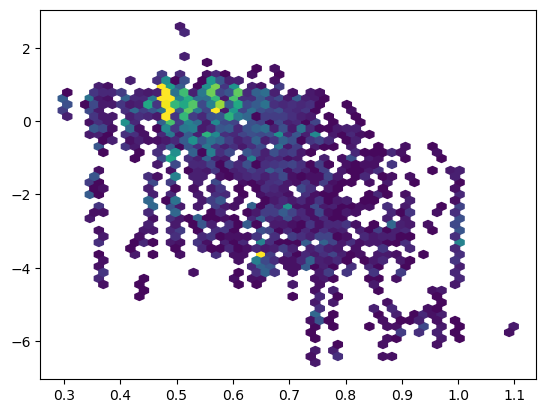

In [110]:
plt.hexbin(stn_buffers['BuERI_mode'], stn_buffers['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)

In [1]:
plt.hexbin(stn_buffers['BuAdj'], stn_buffers['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)

NameError: name 'plt' is not defined

# If running again

In [4]:
radius = 300
stn_buffers = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/mbike/270623_processed_station_params_{radius}.parquet')


In [5]:
# add station temp to plot

temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']
temp['datetime_UTC'] = temp['datetime_UTC'].astype(str)
temp = temp[temp['data_type'] == 'observed']
temp = temp.pivot(index='station_id', columns='datetime_UTC', values='value')

In [6]:
radius = 300
vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
vars.index = vars['station_id']
to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF_3D']
vars = vars.drop(to_remove, axis=1)
vars = vars.merge(temp, left_on='station_id', right_on='station_id',how='inner')

#vars["BuAdj"] = -vars["BuAdj"]  # Invert BuAdj values

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_30531/1990496752.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad = 2, w_pad=0.01)


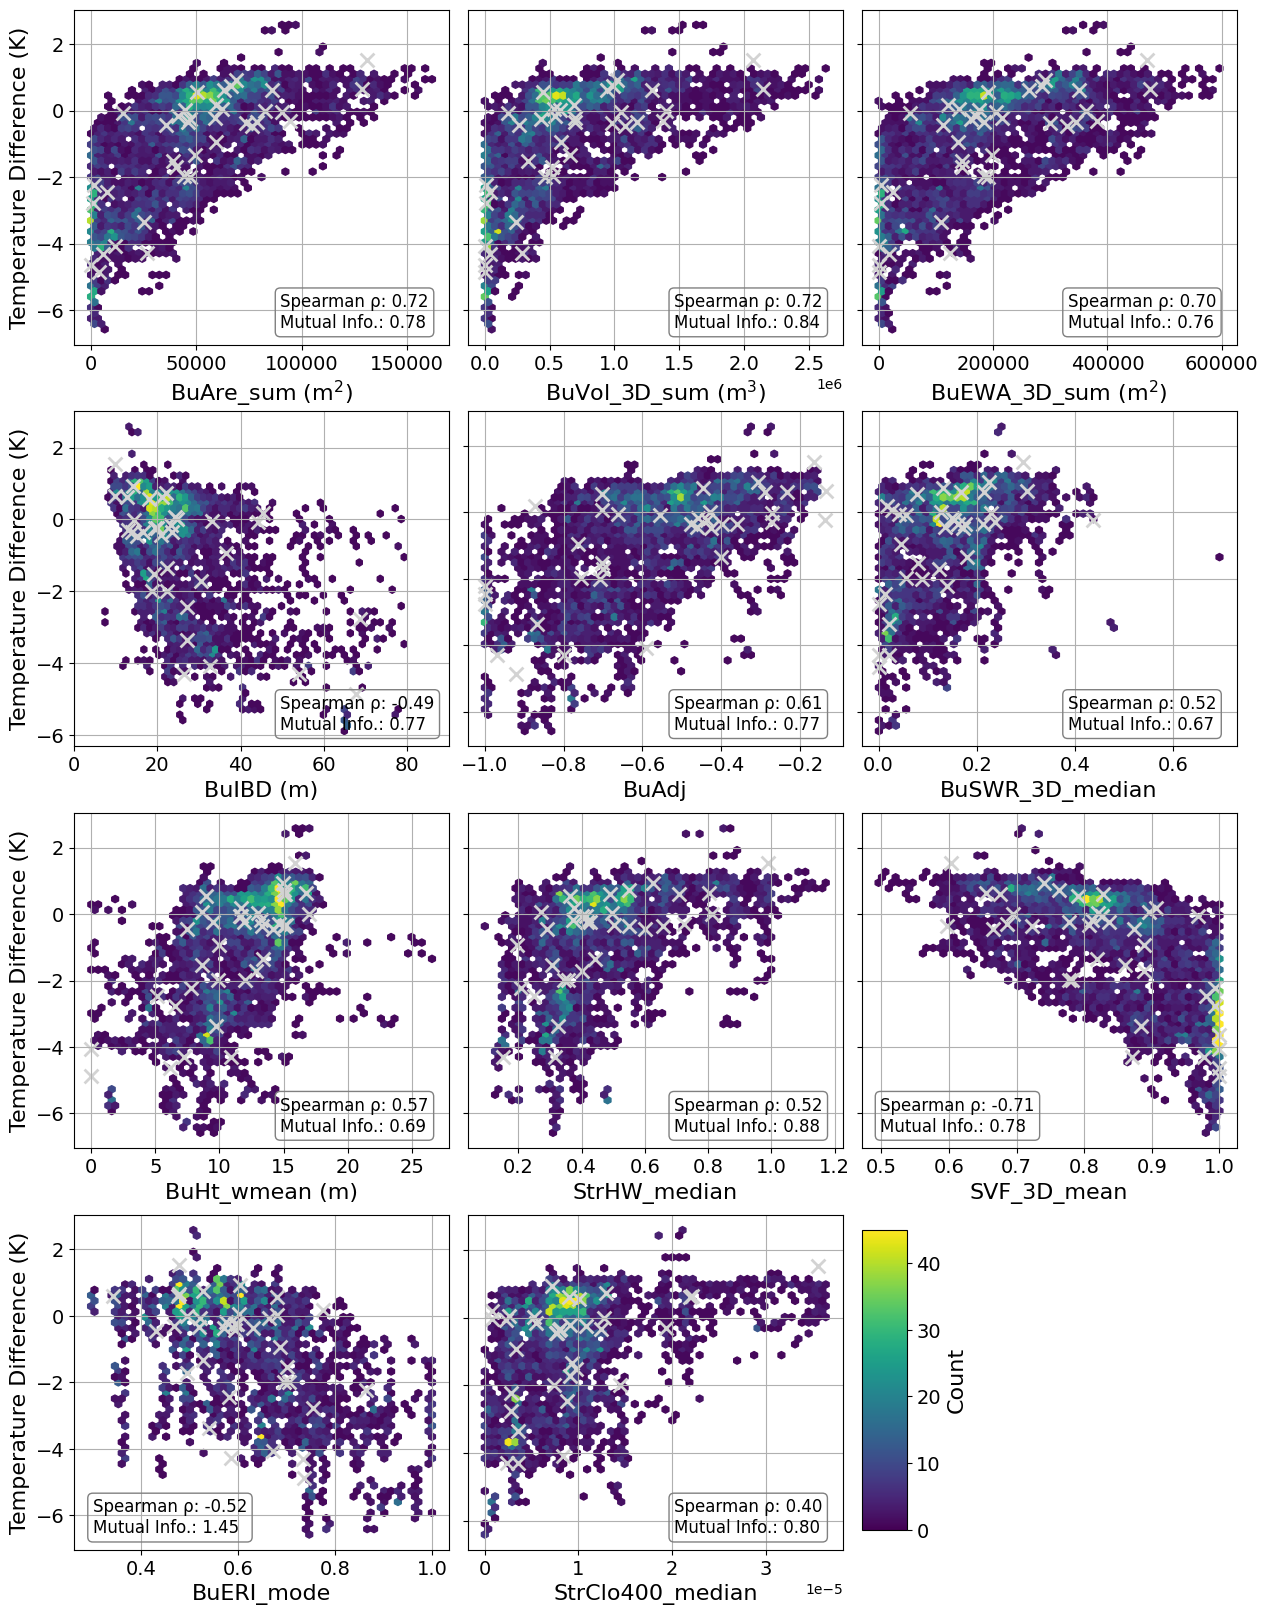

In [14]:
# make 3 by 4 plot with the following parameters
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median']
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(4, 3, figure=fig, wspace=0.05, hspace=0.2)  # 4 rows, 3 columns

#fig.subplots_adjust(wspace=0.1)
for i in range(11):  # First 11 subplots
    ax = fig.add_subplot(gs[i])
    if params[i] == 'BuAre_sum':
        im= ax.hexbin(stn_buffers['BuAre_sum'], stn_buffers['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars['BuAre_sum'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('BuAre_sum (m$^2$)',fontsize=16)
        #ax.text(120000,1.7, r"$\rho$ = 0.72""\n""MI=0.78",fontsize=16)
        ax.text(0.55, 0.05, r"Spearman ρ: 0.72""\n""Mutual Info.: 0.78", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))
    elif params[i] == 'BuVol_3D_sum':
        ax.hexbin(stn_buffers[stn_buffers['BuVol_3D_sum']!=0]['BuVol_3D_sum'], stn_buffers[stn_buffers['BuVol_3D_sum']!=0]['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars['BuVol_3D_sum'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('BuVol_3D_sum (m$^3$)',fontsize=16)
        #ax.text(1500000,1.7, r"$\rho$ = 0.72""\n""MI=0.84",fontsize=16)
        ax.text(0.55, 0.05, r"Spearman ρ: 0.72""\n""Mutual Info.: 0.84", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))
    elif params[i] == 'BuEWA_3D_sum':
        ax.hexbin(stn_buffers[stn_buffers['BuEWA_3D_sum']!=0]['BuEWA_3D_sum'], stn_buffers[stn_buffers['BuEWA_3D_sum']!=0]['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars['BuEWA_3D_sum'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('BuEWA_3D_sum (m$^2$)',fontsize=16)
        #ax.text(400000,1.7, r"$\rho$ = 0.70""\n""MI=0.76",fontsize=16)
        ax.text(0.55, 0.05, r"Spearman ρ: 0.70""\n""Mutual Info.: 0.76", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))
    elif params[i] == 'BuIBD':
        ax.hexbin(stn_buffers[stn_buffers['BuIBD']<80]['BuIBD'].astype(float), stn_buffers[stn_buffers['BuIBD']<80]['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars['BuIBD'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('BuIBD (m)',fontsize=16)
        ax.set_xlim(0,90)
        #ax.text(60,1.7, r"$\rho$ = -0.49""\n""MI=0.77",fontsize=16)
        ax.text(0.55, 0.05, r"Spearman ρ: -0.49""\n""Mutual Info.: 0.77", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))
    elif params[i] == 'BuAdj':
        ax.hexbin(-stn_buffers['BuAdj'], stn_buffers['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(-vars['BuAdj'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('BuAdj',fontsize=16)
        #ax.text(0.7,1.7, r"$\rho$ = -0.61""\n""MI=0.77",fontsize=16)
        ax.text(0.55, 0.05, r"Spearman ρ: 0.61""\n""Mutual Info.: 0.77", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))
    elif params[i] == 'BuSWR_3D_median':
        ax.hexbin(stn_buffers[stn_buffers['BuSWR_3D_median']!=0]['BuSWR_3D_median'], stn_buffers[stn_buffers['BuSWR_3D_median']!=0]['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars['BuSWR_3D_median'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('BuSWR_3D_median',fontsize=16)
        #ax.text(0.5,1.7, r"$\rho$ = 0.52""\n""MI=0.67",fontsize=16)
        ax.text(0.55, 0.05, r"Spearman ρ: 0.52""\n""Mutual Info.: 0.67", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))
    elif params[i] == 'BuHt_wmean':
        ax.hexbin(stn_buffers[stn_buffers['BuHt_wmean']!=0]['BuHt_wmean'], stn_buffers[stn_buffers['BuHt_wmean']!=0]['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars['BuHt_wmean'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('BuHt_wmean (m)',fontsize=16)
        #ax.text(20,1.7, r"$\rho$ = 0.57""\n""MI=0.69",fontsize=16)
        ax.text(0.55, 0.05, r"Spearman ρ: 0.57""\n""Mutual Info.: 0.69", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))
    elif params[i] == 'StrHW_median':
        ax.hexbin(stn_buffers[stn_buffers['StrHW_median']<10]['StrHW_median'],stn_buffers[stn_buffers['StrHW_median']<10]['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars['StrHW_median'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('StrHW_median',fontsize=16)
        #ax.text(0.9,1.7, r"$\rho$ = 0.52""\n""MI=0.88",fontsize=16)
        ax.text(0.55, 0.05, r"Spearman ρ: 0.52""\n""Mutual Info.: 0.88", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))
        #ax.set_xlim(0,1.5)
    elif params[i] == 'SVF_3D_mean':
        ax.hexbin(stn_buffers['SVF_3D_mean'], stn_buffers['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars['SVF_3D_mean'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('SVF_3D_mean',fontsize=16)
        #ax.text(0.85,1.7, r"$\rho$ = -0.71""\n""MI=0.78",fontsize=16)
        ax.text(0.05, 0.05, r"Spearman ρ: -0.71""\n""Mutual Info.: 0.78", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))
    elif params[i] == 'BuERI_mode':
        ax.hexbin(stn_buffers[(stn_buffers['BuERI_mode']>0)&(stn_buffers['BuERI_mode']<1)]['BuERI_mode'], stn_buffers[(stn_buffers['BuERI_mode']>0)&(stn_buffers['BuERI_mode']<1)]['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars[(vars['BuERI_mode']>0)&(vars['BuERI_mode']<1)]['BuERI_mode'], vars[(vars['BuERI_mode']>0)&(vars['BuERI_mode']<1)]['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('BuERI_mode',fontsize=16)
        #ax.text(0.9,1.7, r"$\rho$ = -0.41""\n""MI=0.50",fontsize=16)
        ax.text(0.05, 0.05, r"Spearman ρ: -0.52""\n""Mutual Info.: 1.45", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))

    elif params[i] == 'StrClo400_median':
        ax.hexbin(stn_buffers['StrClo400_median'], stn_buffers['Temperature_diff_K'],mincnt=1, gridsize=50, cmap='viridis', vmin=0,vmax=45)
        ax.scatter(vars['StrClo400_median'], vars['2023-06-27 20:00:00+00:00']-21.59, marker ='x', c='lightgrey', alpha =1,s=100,linewidths=2)
        ax.set_xlabel('StrClo400_median',fontsize=16)
        #ax.text(0.000028,1.9, r"$\rho$ = 0.40""\n""MI=0.80",fontsize=16)
        ax.text(0.55, 0.05, r"Spearman ρ: 0.40""\n""Mutual Info.: 0.80", transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='none'))


    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_ylabel('Temperature Difference (K)',fontsize=16)
    ax.grid()

    if i % 3 != 0:  # 1st column (index 0, 3, 6, ...) keeps labels
        ax.set_ylabel("")  # Remove y-axis label
        ax.yaxis.set_ticklabels([])  # Remove y-axis ticks
    
# Add the colorbar as the 12th subplot
cbar_ax = fig.add_subplot(gs[11])  # Last subplot
cbar_ax.set_position([0.65, 0.12, 0.03, 0.15])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, orientation='vertical')
cbar_ax.tick_params(axis='y', labelsize=14)  # Adjust the tick font size (e.g., 12)
cbar_ax.set_ylabel('Count', fontsize=16)

plt.tight_layout(pad = 2, w_pad=0.01)
plt.savefig('/Users/lisawink/Documents/paper1/figures/fig8/270623_mbike_300m_eri.png', dpi=300, bbox_inches='tight')
plt.savefig('/Users/lisawink/Documents/paper1/figures/fig8/270623_mbike_300m_eri.pdf')
plt.savefig('/Users/lisawink/Documents/paper1/figures/fig8/270623_mbike_300m_eri.svg')
plt.show()

### Calculate labels

In [9]:
# spearman correlation of data
from scipy.stats import pearsonr, spearmanr
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median']

for i in params:

    data = stn_buffers[[i,'Temperature_diff_K']].dropna()
    spearman = spearmanr(data[i], data['Temperature_diff_K'])
    print(i, spearman)


BuAre_sum SignificanceResult(statistic=0.7195245121533279, pvalue=0.0)
BuVol_3D_sum SignificanceResult(statistic=0.7238714707106089, pvalue=0.0)
BuEWA_3D_sum SignificanceResult(statistic=0.7004659564158483, pvalue=0.0)
BuIBD SignificanceResult(statistic=-0.4861278459702284, pvalue=0.0)
BuAdj SignificanceResult(statistic=-0.6087434980924655, pvalue=0.0)
BuSWR_3D_median SignificanceResult(statistic=0.5164056794403572, pvalue=0.0)
BuHt_wmean SignificanceResult(statistic=0.571760902809407, pvalue=0.0)
StrHW_median SignificanceResult(statistic=0.5233956650473369, pvalue=0.0)
SVF_3D_mean SignificanceResult(statistic=-0.7082080163057006, pvalue=0.0)
BuERI_mode SignificanceResult(statistic=-0.5224129377333145, pvalue=0.0)
StrClo400_median SignificanceResult(statistic=0.398533351005574, pvalue=1.9268951463029676e-200)


In [10]:
# MI
from sklearn.feature_selection import mutual_info_regression

for i in params:

    data = stn_buffers[[i,'Temperature_diff_K']].dropna()
    mi = mutual_info_regression(data[[i]], data['Temperature_diff_K'])
    print(i, mi)


BuAre_sum [0.7782517]
BuVol_3D_sum [0.83591766]
BuEWA_3D_sum [0.76387619]
BuIBD [0.76958148]
BuAdj [0.76568673]
BuSWR_3D_median [0.67461648]
BuHt_wmean [0.69571968]
StrHW_median [0.88144237]
SVF_3D_mean [0.78379397]
BuERI_mode [1.44624652]
StrClo400_median [0.80066004]


at 1000m

In [98]:
# spearman correlation of data
from scipy.stats import pearsonr, spearmanr
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_wmean','StrClo400_median']

for i in params:

    data = stn_buffers[[i,'Temperature_diff_K']].dropna()
    spearman = spearmanr(data[i], data['Temperature_diff_K'])
    print(i, spearman)

BuAre_sum SignificanceResult(statistic=0.7906224804920418, pvalue=2.266092348805295e-127)
BuVol_3D_sum SignificanceResult(statistic=0.7674468208565959, pvalue=1.2849475648144243e-115)
BuEWA_3D_sum SignificanceResult(statistic=0.7648934253739044, pvalue=2.089409556384189e-114)
BuIBD SignificanceResult(statistic=-0.6048344224439717, pvalue=1.511099338960062e-59)
BuAdj SignificanceResult(statistic=-0.677391309241709, pvalue=2.584333723730918e-80)
BuSWR_3D_median SignificanceResult(statistic=0.5689166563136923, pvalue=7.101286518850862e-51)
BuHt_wmean SignificanceResult(statistic=0.5766311342719537, pvalue=1.3890371649258194e-53)
StrHW_median SignificanceResult(statistic=0.5520541407979225, pvalue=1.5290191406282962e-46)
SVF_3D_mean SignificanceResult(statistic=-0.7633999097547413, pvalue=1.1759600148908742e-114)
BuERI_wmean SignificanceResult(statistic=-0.531205240061608, pvalue=2.8754196290500703e-44)
StrClo400_median SignificanceResult(statistic=0.34981376037668577, pvalue=3.63150314257

In [99]:
#at 1000m
# MI
from sklearn.feature_selection import mutual_info_regression

for i in params:

    data = stn_buffers[[i,'Temperature_diff_K']].dropna()
    mi = mutual_info_regression(data[[i]], data['Temperature_diff_K'])
    print(i, mi)

BuAre_sum [0.59107276]
BuVol_3D_sum [0.55896079]
BuEWA_3D_sum [0.5264573]
BuIBD [0.31342587]
BuAdj [0.4043004]
BuSWR_3D_median [0.41276446]
BuHt_wmean [0.3885864]
StrHW_median [0.29322613]
SVF_3D_mean [0.52686142]
BuERI_wmean [0.24685515]
StrClo400_median [0.31397529]


### For spider plots

In [32]:
i='BuSWR_median'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuSWR_median SignificanceResult(statistic=0.4931647864938912, pvalue=0.0)


In [33]:
i='BuSWR_mean'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuSWR_mean SignificanceResult(statistic=0.5066096972632727, pvalue=0.0)


In [34]:
i='BuSWR_3D_mean'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuSWR_3D_mean SignificanceResult(statistic=0.44549194631683453, pvalue=1.6633000379177181e-251)


In [35]:
i='BuHt_mean'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuHt_mean SignificanceResult(statistic=0.48632742405473317, pvalue=2.5195428813804292e-306)


In [36]:
i='BuHt_median'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuHt_median SignificanceResult(statistic=0.46032392217148044, pvalue=1.4704695328000609e-270)


In [37]:
i='BuHt_wmedian'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuHt_wmedian SignificanceResult(statistic=0.4570739034061414, pvalue=1.558031406214249e-262)


In [38]:
i='StrHW_mean'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

StrHW_mean SignificanceResult(statistic=0.49326198420673995, pvalue=5.169706724499777e-291)


In [41]:
i='BuSqC_wmedian'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuSqC_wmedian SignificanceResult(statistic=-0.3003030666755747, pvalue=9.749988677530103e-112)


In [48]:
i='BuSqC_mean'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuSqC_mean SignificanceResult(statistic=-0.2525596796990589, pvalue=1.6598465925716438e-78)


In [42]:
i='BuCCo_wmean'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuCCo_wmean SignificanceResult(statistic=-0.37105130500233324, pvalue=5.450648137222511e-174)


In [43]:
i='BuCCo_mean'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuCCo_mean SignificanceResult(statistic=-0.3329381373350235, pvalue=2.0271728248584138e-138)


In [49]:
i='BuCCo_median'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuCCo_median SignificanceResult(statistic=-0.2660867712825855, pvalue=2.998547464827431e-87)


In [46]:
i='BuCCo_wmedian'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuCCo_wmedian SignificanceResult(statistic=-0.3037711308146176, pvalue=2.0484032017587853e-114)


In [59]:
i='BuSqu_wmedian'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuSqu_wmedian SignificanceResult(statistic=-0.2342041695551, pvalue=1.1023067471196895e-64)


In [64]:
i='BuCube_3D_median'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuCube_3D_median SignificanceResult(statistic=-0.06398972864893238, pvalue=3.967086593061036e-06)


In [66]:
i='BuCubo_3D_wmedian'
data = stn_buffers[[i,'Temperature_diff_K']].dropna()
spearman = spearmanr(data[i], data['Temperature_diff_K'])
print(i, spearman)

BuCubo_3D_wmedian SignificanceResult(statistic=-0.12946792903310686, pvalue=1.4537402640314943e-20)


In [15]:
stn_buffers

System_ID                  Time_UTC  Seconds_in_day  Altitude  \
0             1  2023-06-27T19:20:44.000Z           69643     256.9   
1             1  2023-06-27T19:20:51.000Z           69651     258.8   
2             1  2023-06-27T19:21:05.000Z           69665     257.5   
3             1  2023-06-27T19:21:14.000Z           69673     261.4   
4             1  2023-06-27T19:21:42.000Z           69702     258.3   
...         ...                       ...             ...       ...   
5936         40  2023-06-27T20:30:44.000Z           73843     266.5   
5937         40  2023-06-27T20:30:46.000Z           73846     267.0   
5938         40  2023-06-27T20:30:50.000Z           73849     267.0   
5939         40  2023-06-27T20:30:53.000Z           73853     269.8   
5940         40  2023-06-27T20:30:55.000Z           73855     271.8   

       Latitude  Longitude  Temperature_diff_K  Absolute_temperature_degC  \
0     47.992112   7.845233                1.30                      23.53   
1     47.991700   7.845267                1.10                      23.33   
2     47.991107   7.845255                1.02                      23.22   
3     47.991080   7.845272                1.02                      23.22   
4     47.990405   7.844355                1.02                      23.22   
...         ...        ...                 ...                        ...   
5936  47.991900   7.845425               -0.75                      20.16   
5937  47.991982   7.845422               -0.54                      20.36   
5938  47.992112   7.845410               -0.44                      20.46   
5939  47.992188   7.845352               -0.44                      20.46   
5940  47.992223   7.845267               -0.44                      20.46   

      Relhumidity_diff_percent  Relhumidity_percent  ...  StrSCl_MAD  \
0                         -3.8                 37.9  ...    0.045455   
1                         -3.7                 37.9  ...    0.024242   
2                         -3.2                 38.2  ...    0.024242   
3                         -3.1                 38.3  ...    0.024242   
4                         -2.5                 38.9  ...    0.012121   
...                        ...                  ...  ...         ...   
5936                       3.6                 50.9  ...    0.038462   
5937                       2.6                 49.8  ...    0.038462   
5938                       2.4                 49.6  ...    0.038462   
5939                       2.3                 49.5  ...    0.000000   
5940                       2.0                 49.2  ...    0.000000   

      StrSCl_skew StrSCl_per25  StrSCl_per75     BuCAR  \
0        0.358510     0.000000      0.076923  0.271903   
1        0.185383     0.000000      0.076923  0.231572   
2        0.640668     0.019231      0.076923  0.220690   
3        0.640668     0.019231      0.076923  0.222072   
4        0.367753     0.032609      0.076923  0.205639   
...           ...          ...           ...       ...   
5936     0.437603     0.000000      0.076923  0.253987   
5937     0.437603     0.000000      0.076923  0.260299   
5938     0.455691     0.000000      0.076923  0.267029   
5939     0.630329     0.000000      0.076923  0.275620   
5940     0.630329     0.000000      0.076923  0.274172   

                                                 SVF_3D  SVF_3D_mean  \
0     {'count': 70878, 'max': 1.0, 'mean': 0.7177317...     0.717732   
1     {'count': 77662, 'max': 1.0, 'mean': 0.7601647...     0.760165   
2     {'count': 78997, 'max': 1.0, 'mean': 0.7774007...     0.777401   
3     {'count': 79073, 'max': 1.0, 'mean': 0.7771104...     0.777110   
4     {'count': 82746, 'max': 1.0, 'mean': 0.7872976...     0.787298   
...                                                 ...          ...   
5936  {'count': 73987, 'max': 1.0, 'mean': 0.7420448...     0.742045   
5937  {'count': 72773, 'max': 1.0, 'mean': 0.7308574...     0.730857   
5938  {'count': 70

### For all parameters (and table 2)

In [73]:
spearman_df = {}

param_list = []
spearman_r_list = []
spearman_p_list = []

for i in stn_buffers.drop(['station_id','System_ID','Time_UTC','Seconds_in_day','Altitude','Latitude','Longitude','Temperature_diff_K','Absolute_temperature_degC','Relhumidity_diff_percent','Relhumidity_percent','Vapourpressure_diff_hPa','Vapourpressure_hPa','geometry','SVF_3D'], axis=1).columns:
    print(i)
    data = stn_buffers[[i,'Temperature_diff_K']].dropna()
    spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
    param_list.append(i)
    spearman_r_list.append(spearman_r)
    spearman_p_list.append(spearman_p)

spearman_df['parameter'] = param_list
spearman_df['spearman_r'] = spearman_r_list
spearman_df['spearman_p'] = spearman_p_list

spearman_df = pd.DataFrame(spearman_df)


BuAdj
BuIBD
BuAre_mean
BuAre_median
BuAre_std
BuAre_min
BuAre_max
BuAre_sum
BuAre_mode
BuAre_IQR
BuAre_MAD
BuAre_skew
BuAre_per25
BuAre_per75
BuNum
BuHt_mean
BuHt_median
BuHt_std
BuHt_min
BuHt_max
BuHt_sum
BuHt_mode
BuHt_wmean
BuHt_wstd
BuHt_wmedian
BuHt_wmin
BuHt_wmax
BuHt_wsum
BuHt_wper25
BuHt_wper75
BuHt_IQR
BuHt_MAD
BuHt_skew
BuHt_per25
BuHt_per75
BuPer_mean
BuPer_median
BuPer_std
BuPer_min
BuPer_max
BuPer_sum
BuPer_mode
BuPer_wmean
BuPer_wstd
BuPer_wmedian
BuPer_wmin
BuPer_wmax
BuPer_wsum
BuPer_wper25
BuPer_wper75
BuPer_IQR
BuPer_MAD
BuPer_skew
BuPer_per25
BuPer_per75
BuLAL_mean
BuLAL_median
BuLAL_std
BuLAL_min
BuLAL_max
BuLAL_sum
BuLAL_mode
BuLAL_wmean
BuLAL_wstd


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])


BuLAL_wmedian
BuLAL_wmin
BuLAL_wmax
BuLAL_wsum
BuLAL_wper25
BuLAL_wper75
BuLAL_IQR
BuLAL_MAD
BuLAL_skew
BuLAL_per25
BuLAL_per75
BuCCD_mean_mean
BuCCD_mean_median
BuCCD_mean_std
BuCCD_mean_min
BuCCD_mean_max
BuCCD_mean_sum
BuCCD_mean_mode
BuCCD_mean_wmean
BuCCD_mean_wstd
BuCCD_mean_wmedian
BuCCD_mean_wmin
BuCCD_mean_wmax
BuCCD_mean_wsum
BuCCD_mean_wper25
BuCCD_mean_wper75
BuCCD_mean_IQR
BuCCD_mean_MAD
BuCCD_mean_skew
BuCCD_mean_per25
BuCCD_mean_per75
BuCCD_std_mean
BuCCD_std_median
BuCCD_std_std
BuCCD_std_min
BuCCD_std_max
BuCCD_std_sum
BuCCD_std_mode
BuCCD_std_wmean
BuCCD_std_wstd
BuCCD_std_wmedian
BuCCD_std_wmin
BuCCD_std_wmax
BuCCD_std_wsum
BuCCD_std_wper25
BuCCD_std_wper75
BuCCD_std_IQR
BuCCD_std_MAD
BuCCD_std_skew
BuCCD_std_per25
BuCCD_std_per75
BuCor_mean
BuCor_median
BuCor_std
BuCor_min
BuCor_max
BuCor_sum
BuCor_mode
BuCor_wmean
BuCor_wstd
BuCor_wmedian
BuCor_wmin
BuCor_wmax
BuCor_wsum
BuCor_wper25
BuCor_wper75
BuCor_IQR
BuCor_MAD
BuCor_skew
BuCor_per25
BuCor_per75
CyAre_mean
CyA

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K

BuCCo_per75
BuCWA_mean
BuCWA_median
BuCWA_std
BuCWA_min
BuCWA_max
BuCWA_sum
BuCWA_mode
BuCWA_wmean
BuCWA_wstd
BuCWA_wmedian
BuCWA_wmin
BuCWA_wmax
BuCWA_wsum
BuCWA_wper25
BuCWA_wper75
BuCWA_IQR
BuCWA_MAD
BuCWA_skew
BuCWA_per25
BuCWA_per75
BuCon_mean
BuCon_median
BuCon_std
BuCon_min
BuCon_max
BuCon_sum
BuCon_mode
BuCon_wmean
BuCon_wstd
BuCon_wmedian
BuCon_wmin
BuCon_wmax
BuCon_wsum
BuCon_wper25
BuCon_wper75
BuCon_IQR
BuCon_MAD
BuCon_skew
BuCon_per25
BuCon_per75
BuElo_mean
BuElo_median
BuElo_std
BuElo_min
BuElo_max
BuElo_sum
BuElo_mode
BuElo_wmean
BuElo_wstd
BuElo_wmedian
BuElo_wmin
BuElo_wmax
BuElo_wsum
BuElo_wper25
BuElo_wper75
BuElo_IQR
BuElo_MAD
BuElo_skew
BuElo_per25
BuElo_per75
BuERI_mean
BuERI_median
BuERI_std
BuERI_min
BuERI_max
BuERI_sum
BuERI_mode
BuERI_wmean
BuERI_wstd
BuERI_wmedian
BuERI_wmin
BuERI_wmax
BuERI_wsum
BuERI_wper25
BuERI_wper75
BuERI_IQR
BuERI_MAD
BuERI_skew
BuERI_per25
BuERI_per75
BuFR_mean
BuFR_median
BuFR_std
BuFR_min
BuFR_max
BuFR_sum
BuFR_mode
BuFR_wmean
BuFR_

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K

BuFF_3D_mode
BuFF_3D_wmean
BuFF_3D_wstd
BuFF_3D_wmedian
BuFF_3D_wmin
BuFF_3D_wmax
BuFF_3D_wsum
BuFF_3D_wper25
BuFF_3D_wper75
BuFF_3D_IQR
BuFF_3D_MAD
BuFF_3D_skew
BuFF_3D_per25
BuFF_3D_per75
BuEPI_3D_mean
BuEPI_3D_median
BuEPI_3D_std
BuEPI_3D_min
BuEPI_3D_max
BuEPI_3D_sum
BuEPI_3D_mode
BuEPI_3D_wmean
BuEPI_3D_wstd
BuEPI_3D_wmedian
BuEPI_3D_wmin
BuEPI_3D_wmax
BuEPI_3D_wsum
BuEPI_3D_wper25
BuEPI_3D_wper75
BuEPI_3D_IQR
BuEPI_3D_MAD
BuEPI_3D_skew
BuEPI_3D_per25
BuEPI_3D_per75
BuProx_mean
BuProx_median
BuProx_std
BuProx_min
BuProx_max
BuProx_sum
BuProx_mode
BuProx_wmean
BuProx_wstd
BuProx_wmedian
BuProx_wmin
BuProx_wmax
BuProx_wsum
BuProx_wper25
BuProx_wper75
BuProx_IQR
BuProx_MAD
BuProx_skew
BuProx_per25
BuProx_per75
BuProx_3D_mean
BuProx_3D_median
BuProx_3D_std
BuProx_3D_min
BuProx_3D_max
BuProx_3D_sum
BuProx_3D_mode
BuProx_3D_wmean
BuProx_3D_wstd
BuProx_3D_wmedian
BuProx_3D_wmin
BuProx_3D_wmax
BuProx_3D_wsum
BuProx_3D_wper25
BuProx_3D_wper75
BuProx_3D_IQR
BuProx_3D_MAD
BuProx_3D_skew
BuPr

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K'])
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_93091/3277511074.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(data[i], data['Temperature_diff_K

BuSpi_3D_IQR
BuSpi_3D_MAD
BuSpi_3D_skew
BuSpi_3D_per25
BuSpi_3D_per75
BuPerC_mean
BuPerC_median
BuPerC_std
BuPerC_min
BuPerC_max
BuPerC_sum
BuPerC_mode
BuPerC_wmean
BuPerC_wstd
BuPerC_wmedian
BuPerC_wmin
BuPerC_wmax
BuPerC_wsum
BuPerC_wper25
BuPerC_wper75
BuPerC_IQR
BuPerC_MAD
BuPerC_skew
BuPerC_per25
BuPerC_per75
BuCf_3D_mean
BuCf_3D_median
BuCf_3D_std
BuCf_3D_min
BuCf_3D_max
BuCf_3D_sum
BuCf_3D_mode
BuCf_3D_wmean
BuCf_3D_wstd
BuCf_3D_wmedian
BuCf_3D_wmin
BuCf_3D_wmax
BuCf_3D_wsum
BuCf_3D_wper25
BuCf_3D_wper75
BuCf_3D_IQR
BuCf_3D_MAD
BuCf_3D_skew
BuCf_3D_per25
BuCf_3D_per75
BuDep_mean
BuDep_median
BuDep_std
BuDep_min
BuDep_max
BuDep_sum
BuDep_mode
BuDep_wmean
BuDep_wstd
BuDep_wmedian
BuDep_wmin
BuDep_wmax
BuDep_wsum
BuDep_wper25
BuDep_wper75
BuDep_IQR
BuDep_MAD
BuDep_skew
BuDep_per25
BuDep_per75
BuDep_3D_mean
BuDep_3D_median
BuDep_3D_std
BuDep_3D_min
BuDep_3D_max
BuDep_3D_sum
BuDep_3D_mode
BuDep_3D_wmean
BuDep_3D_wstd
BuDep_3D_wmedian
BuDep_3D_wmin
BuDep_3D_wmax
BuDep_3D_wsum
BuDep_3D

In [74]:
spearman_df['parameter'].values

array(['BuAdj', 'BuIBD', 'BuAre_mean', ..., 'SVF_3D_max', 'SVF_3D_sum',
       'SVF_3D_majority'], dtype=object)

In [75]:
# Define mapping of abbreviations to categories
# Define mapping of abbreviations to categories
prefix_to_category = {
    'BuAre': 'Dimension', 'BuHt': 'Dimension', 'BuPer': 'Dimension',
    'BuLAL': 'Dimension', 'BuCCD': 'Dimension', 'BuCor': 'Dimension',
    'BuSA' : 'Dimension', 'BuVol': 'Dimension', 'BuSWA': 'Dimension', 
    'BuEWA': 'Dimension','BumVE' : 'Dimension',  'BuMVE' : 'Dimension',
    'CyAre': 'Dimension', 'CyInd': 'Dimension', 'BuCAR': 'Dimension', 
    'BuCWA': 'Shape', 'BuCorDev': 'Shape',
    'BuCon': 'Shape', 'BuElo': 'Shape', 'BuERI': 'Shape', 'BuEPI': 'Shape',
    'BuFR': 'Shape', 'BuFF': 'Shape', 'BuFD': 'Shape', 'BuCf': 'Shape',
    'BuRec': 'Shape', 'BuShI': 'Shape', 'BuSqC': 'Shape', 'BuEx': 'Shape',
    'BuSqu': 'Shape', 'BuCir': 'Shape','BuCCo': 'Shape', 'BuHem': 'Shape',
    'BuFra' : 'Shape','BuCube' : 'Shape', 'BuCubo' : 'Shape',  'BuProx' : 'Shape',
    'BuSpi' : 'Shape', 'BuPerC' : 'Shape', 'BuGir' : 'Shape', 'BuDisp' : 'Shape',
    'BuRan' : 'Shape', 'BuDep' : 'Shape', 'BuAdj': 'Distribution', 'BuIBD': 'Distribution',
    'BuSWR': 'Distribution', 'BuOri': 'Orientation', 'BuAli': 'Orientation',
    'StrAli': 'Orientation', 'StrW': 'Distribution', 'StrWD': 'Distribution',
    'StrOpe': 'Distribution', 'StrHW': 'Distribution', 'StrH': 'Dimension',
    'StrHD': 'Distribution','StrLen': 'Dimension',
    'StrCNS': 'Dimension', 'BpM': 'Intensity', 'StrLin': 'Shape',
    'StrClo400': 'Connectivity', 'StrBet400': 'Connectivity', 
    'StrSCl': 'Connectivity', 'StrCyc400': 'Connectivity', 
    'StrENR400': 'Connectivity', 'StrGam400': 'Connectivity', 
    'StrDeg': 'Connectivity', 'StrMes400': 'Connectivity',
    'SVF': 'Distribution'
}

unique_prefixes = [item.split('_')[0] for item in spearman_df['parameter'].values]

# Generate categories data dynamically
categories_data = [
    {'Category': prefix_to_category.get(prefix, 'Unknown'), 'Abbrev.': spearman_df['parameter'].values[i]}
    for i,prefix in enumerate(unique_prefixes)
]

In [76]:
# add category column to spearman_df
spearman_df['Category'] = [prefix_to_category.get(prefix, 'Unknown') for prefix in unique_prefixes]

In [77]:
spearman_df

parameter  spearman_r     spearman_p      Category
0               BuAdj   -0.608743   0.000000e+00  Distribution
1               BuIBD   -0.486128   0.000000e+00  Distribution
2          BuAre_mean    0.432545  1.223720e-253     Dimension
3        BuAre_median    0.265419   9.486715e-91     Dimension
4           BuAre_std    0.452813  5.882112e-274     Dimension
...               ...         ...            ...           ...
1457       SVF_3D_IQR    0.687264   0.000000e+00  Distribution
1458       SVF_3D_min   -0.552132   0.000000e+00  Distribution
1459       SVF_3D_max   -0.092142   1.117888e-12  Distribution
1460       SVF_3D_sum   -0.679149   0.000000e+00  Distribution
1461  SVF_3D_majority   -0.699420   0.000000e+00  Distribution

[1462 rows x 4 columns]

In [78]:
for i in spearman_df.sort_values(by='spearman_r', ascending=False).values:
    print(i)

['BuRough_3D_wsum' 0.7324304708470681 0.0 'Unknown']
['BuOri_wsum' 0.7301293028909474 0.0 'Orientation']
['BuHt_wsum' 0.72399714347843 0.0 'Dimension']
['BuVol_3D_sum' 0.7238714707106089 0.0 'Dimension']
['BuFD_wsum' 0.7210791145897811 0.0 'Shape']
['BuFF_wsum' 0.7197224774506019 0.0 'Shape']
['BuAre_sum' 0.7195245121533279 0.0 'Dimension']
['BuCAR' 0.7195245121038712 0.0 'Dimension']
['BuMVE_3D_wsum' 0.718995630909957 0.0 'Dimension']
['BumVE_3D_wsum' 0.718995630909957 0.0 'Dimension']
['BuEPI_3D_wsum' 0.7188954344447637 0.0 'Shape']
['BuCon_3D_wsum' 0.7176782089183954 0.0 'Shape']
['BuCon_wsum' 0.7173435598387865 0.0 'Shape']
['BuCubo_3D_wsum' 0.7167415230217246 0.0 'Shape']
['BuRec_wsum' 0.7161049151834288 0.0 'Shape']
['BuRough_wsum' 0.7152110902645226 0.0 'Unknown']
['BuERI_wsum' 0.7150755929360922 0.0 'Shape']
['BuFra_3D_wsum' 0.7139759437524318 0.0 'Shape']
['BuEWR_3D_wsum' 0.7138241363627867 0.0 'Unknown']
['BuSqu_wsum' 0.7134822442478075 0.0 'Shape']
['BuPerC_wsum' 0.713482244

In [79]:
spearman_df.to_csv('/Users/lisawink/Documents/paper1/data/processed_data/mbike/270623_spearman_correlation.csv')
spearman_df.to_excel('/Users/lisawink/Documents/paper1/data/processed_data/mbike/270623_spearman_correlation.xlsx')

### MI

In [80]:
mi_df = {}

mi_param_list = []
mi_val_list = []

for i in stn_buffers.drop(['station_id','System_ID','Time_UTC','Seconds_in_day','Altitude','Latitude','Longitude','Temperature_diff_K','Absolute_temperature_degC','Relhumidity_diff_percent','Relhumidity_percent','Vapourpressure_diff_hPa','Vapourpressure_hPa','geometry','SVF_3D'], axis=1).columns:
    print(i)
    X = stn_buffers[[i]]
    y = stn_buffers['Temperature_diff_K']

    # Drop rows with NaN values in X and y
    X = X.dropna()
    y = y.loc[X.index]

    if len(X) > 2:
        mi = mutual_info_regression(X, y)
    else:
        mi = [np.nan]
    mi_param_list.append(i)
    mi_val_list.append(mi[0])

mi_df['parameter'] = mi_param_list
mi_df['mi'] = mi_val_list

mi_df = pd.DataFrame(mi_df)


BuAdj
BuIBD
BuAre_mean
BuAre_median
BuAre_std
BuAre_min
BuAre_max
BuAre_sum
BuAre_mode
BuAre_IQR
BuAre_MAD
BuAre_skew
BuAre_per25
BuAre_per75
BuNum
BuHt_mean
BuHt_median
BuHt_std
BuHt_min
BuHt_max
BuHt_sum
BuHt_mode
BuHt_wmean
BuHt_wstd
BuHt_wmedian
BuHt_wmin
BuHt_wmax
BuHt_wsum
BuHt_wper25
BuHt_wper75
BuHt_IQR
BuHt_MAD
BuHt_skew
BuHt_per25
BuHt_per75
BuPer_mean
BuPer_median
BuPer_std
BuPer_min
BuPer_max
BuPer_sum
BuPer_mode
BuPer_wmean
BuPer_wstd
BuPer_wmedian
BuPer_wmin
BuPer_wmax
BuPer_wsum
BuPer_wper25
BuPer_wper75
BuPer_IQR
BuPer_MAD
BuPer_skew
BuPer_per25
BuPer_per75
BuLAL_mean
BuLAL_median
BuLAL_std
BuLAL_min
BuLAL_max
BuLAL_sum
BuLAL_mode
BuLAL_wmean
BuLAL_wstd
BuLAL_wmedian
BuLAL_wmin
BuLAL_wmax
BuLAL_wsum
BuLAL_wper25
BuLAL_wper75
BuLAL_IQR
BuLAL_MAD
BuLAL_skew
BuLAL_per25
BuLAL_per75
BuCCD_mean_mean
BuCCD_mean_median
BuCCD_mean_std
BuCCD_mean_min
BuCCD_mean_max
BuCCD_mean_sum
BuCCD_mean_mode
BuCCD_mean_wmean
BuCCD_mean_wstd
BuCCD_mean_wmedian
BuCCD_mean_wmin
BuCCD_mean_wmax


In [81]:
mi_df

parameter        mi
0               BuAdj  0.767149
1               BuIBD  0.768353
2          BuAre_mean  0.654798
3        BuAre_median  0.690606
4           BuAre_std  0.689814
...               ...       ...
1457       SVF_3D_IQR  0.755090
1458       SVF_3D_min  0.729260
1459       SVF_3D_max  0.008894
1460       SVF_3D_sum  0.824062
1461  SVF_3D_majority  0.822994

[1462 rows x 2 columns]

In [82]:
# Define mapping of abbreviations to categories
# Define mapping of abbreviations to categories
prefix_to_category = {
    'BuAre': 'Dimension', 'BuHt': 'Dimension', 'BuPer': 'Dimension', 'BuNum':'Dimension',
    'BuLAL': 'Dimension', 'BuCCD': 'Dimension', 'BuCor': 'Dimension',
    'BuSA' : 'Dimension', 'BuVol': 'Dimension', 'BuSWA': 'Dimension', 
    'BuEWA': 'Dimension','BumVE' : 'Dimension',  'BuMVE' : 'Dimension',
    'CyAre': 'Dimension', 'CyInd': 'Dimension', 'BuCAR': 'Dimension', 'BuSurf': 'Dimension',
    'BuCWA': 'Shape', 'BuCorDev': 'Shape', 'BuRough': 'Shape',
    'BuCon': 'Shape', 'BuElo': 'Shape', 'BuERI': 'Shape', 'BuEPI': 'Shape',
    'BuFR': 'Shape', 'BuFF': 'Shape', 'BuFD': 'Shape', 'BuCf': 'Shape',
    'BuRec': 'Shape', 'BuShI': 'Shape', 'BuSqC': 'Shape', 'BuEx': 'Shape',
    'BuSqu': 'Shape', 'BuCir': 'Shape','BuCCo': 'Shape', 'BuHem': 'Shape',
    'BuFra' : 'Shape','BuCube' : 'Shape', 'BuCubo' : 'Shape',  'BuProx' : 'Shape',
    'BuSpi' : 'Shape', 'BuPerC' : 'Shape', 'BuGir' : 'Shape', 'BuDisp' : 'Shape',
    'BuRan' : 'Shape', 'BuDep' : 'Shape', 'BuAdj': 'Distribution', 'BuIBD': 'Distribution',
    'BuSWR': 'Distribution', 'BuOri': 'Orientation', 'BuAli': 'Orientation',
    'StrAli': 'Orientation', 'StrW': 'Distribution', 'StrWD': 'Distribution',
    'StrOpe': 'Distribution', 'StrHW': 'Distribution', 'StrH': 'Dimension',
    'StrHD': 'Distribution','StrLen': 'Dimension',
    'StrCNS': 'Dimension', 'BpM': 'Intensity', 'StrLin': 'Shape',
    'StrClo400': 'Connectivity', 'StrBet400': 'Connectivity', 
    'StrSCl': 'Connectivity', 'StrCyc400': 'Connectivity', 
    'StrENR400': 'Connectivity', 'StrGam400': 'Connectivity', 
    'StrDeg': 'Connectivity', 'StrMes400': 'Connectivity',
    'SVF': 'Distribution'
}

unique_prefixes = [item.split('_')[0] for item in mi_df['parameter'].values]

# Generate categories data dynamically
categories_data = [
    {'Category': prefix_to_category.get(prefix, 'Unknown'), 'Abbrev.': mi_df['parameter'].values[i]}
    for i,prefix in enumerate(unique_prefixes)
]

In [83]:
# add category column to spearman_df
mi_df['Category'] = [prefix_to_category.get(prefix, 'Unknown') for prefix in unique_prefixes]

In [84]:
for i in mi_df.sort_values(by='mi', ascending=False).values:
    print(i)

['BuERI_min' 1.4475508132647459 'Shape']
['BuERI_mode' 1.4465470863272487 'Shape']
['BuCCo_min' 1.435320352388397 'Shape']
['BuDep_mode' 1.4336360546438573 'Shape']
['BuShI_mode' 1.4313644105027632 'Shape']
['BuDep_min' 1.4303884734260395 'Shape']
['BuCCo_mode' 1.4300004681820022 'Shape']
['BuShI_min' 1.428541967293445 'Shape']
['BuRan_min' 1.4200042140418057 'Shape']
['BuCon_min' 1.4175478876282108 'Shape']
['BuCon_3D_min' 1.4146589700660557 'Shape']
['BuCWA_max' 1.4137271543827326 'Shape']
['BuSpi_mode' 1.4117797082017898 'Shape']
['BuProx_3D_min' 1.411332804380586 'Shape']
['BuSpi_min' 1.4064606297361815 'Shape']
['BuLAL_max' 1.400557470449952 'Dimension']
['BuCon_3D_mode' 1.3994150678376558 'Shape']
['BuSqu_min' 1.395383845889734 'Shape']
['BuProx_3D_mode' 1.3946599191253513 'Shape']
['BuPerC_min' 1.3946293745030212 'Shape']
['BuRough_mode' 1.3943182216146033 'Shape']
['BuRan_mode' 1.393922717669155 'Shape']
['BuSqu_mode' 1.3935338758588203 'Shape']
['BuEx_min' 1.3915254906146926 '

In [85]:
mi_df.to_csv('/Users/lisawink/Documents/paper1/data/processed_data/mbike/270623_mutual_info.csv')
mi_df.to_excel('/Users/lisawink/Documents/paper1/data/processed_data/mbike/270623_mutual_info.xlsx')

<Axes: xlabel='BuDep_mode', ylabel='Temperature_diff_K'>

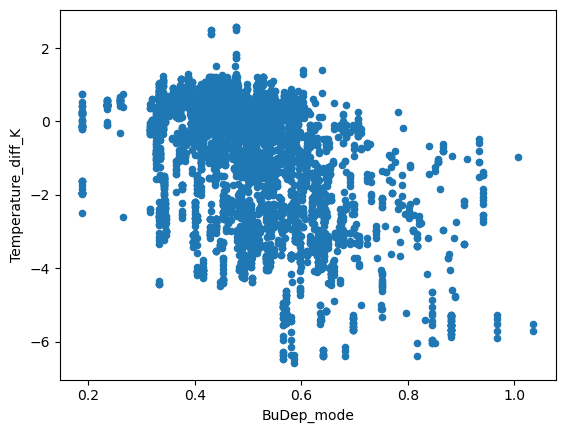

In [52]:
stn_buffers[['BuDep_mode','Temperature_diff_K']].plot.scatter(x='BuDep_mode', y='Temperature_diff_K' )

<Axes: xlabel='BuHt_max', ylabel='Temperature_diff_K'>

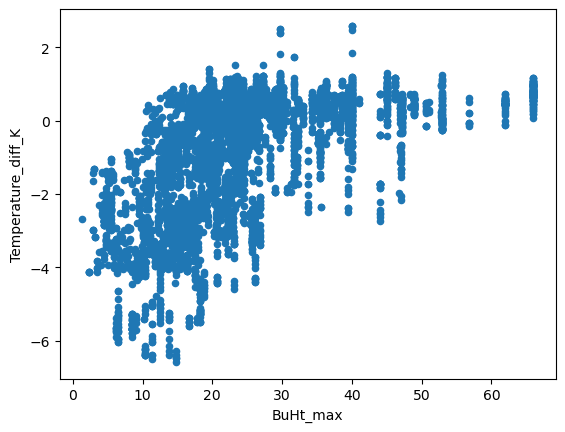

In [87]:
stn_buffers[['BuHt_max','Temperature_diff_K']].plot.scatter(x='BuHt_max', y='Temperature_diff_K' )

<Axes: xlabel='BuRan_min', ylabel='Temperature_diff_K'>

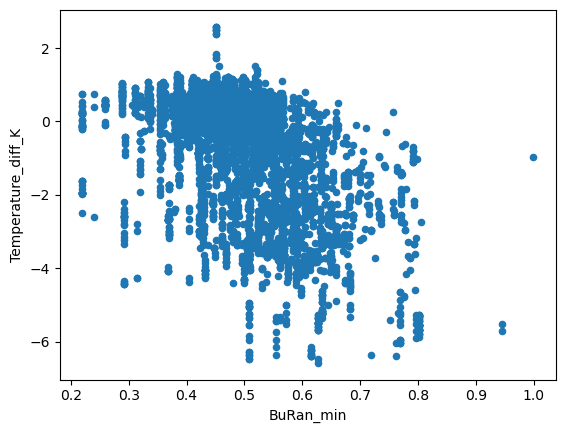

In [54]:
stn_buffers[['BuRan_min','Temperature_diff_K']].plot.scatter(x='BuRan_min', y='Temperature_diff_K' )

<Axes: xlabel='BuERI_mode', ylabel='Temperature_diff_K'>

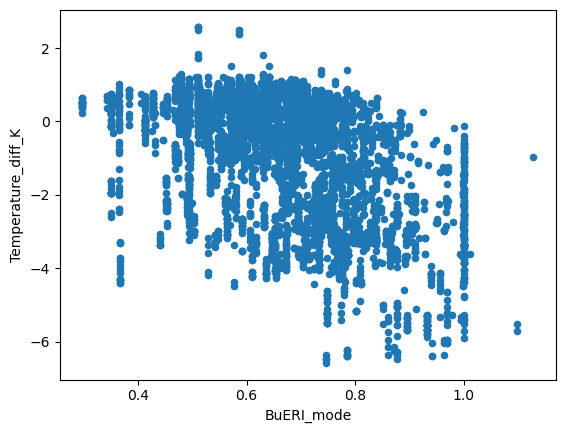

In [56]:
p = 'BuERI_mode'
stn_buffers[[p,'Temperature_diff_K']].plot.scatter(x=p, y='Temperature_diff_K' )